In [6]:

import pickle
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
from IPython.display import Image
import os 
import sys


In [7]:
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)

In [8]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from visualization import *


Let's explore the data that we have trained the model using mlflow which are saved. 

In [9]:
test_feature = pd.read_csv("../features/test_features.csv")
test_feature.head(5)

,experiment,hour,date_of_week,date_of_month,device_make,platform_os,browser
0,1,0,4,10,10,1,1
1,1,21,3,9,0,1,0
2,0,15,4,3,0,1,0
3,1,3,2,8,0,1,0
4,1,20,3,9,0,1,0


In [10]:
test_labels = pd.read_csv("../features/test_labels.csv")
test_labels.head(5)

,aware
0,1
1,0
2,0
3,0
4,1


In [11]:
feature_columns = [f.replace('_', ' ').capitalize() for f in test_feature]
feature_columns

['Experiment',
 'Hour',
 'Date of week',
 'Date of month',
 'Device make',
 'Platform os',
 'Browser']

In [12]:
test_feature

,experiment,hour,date_of_week,date_of_month,device_make,platform_os,browser
0,1,0,4,10,10,1,1
1,1,21,3,9,0,1,0
2,0,15,4,3,0,1,0
3,1,3,2,8,0,1,0
4,1,20,3,9,0,1,0
...,...,...,...,...,...,...,...
120,1,10,4,3,0,1,0
121,1,4,0,6,0,1,0
122,1,21,6,5,0,1,0
123,1,21,3,9,0,1,1


### Logistic Regression



In [13]:
model = pickle.load(open("../models/logistic_model.pickle", "rb"))
model


LogisticRegression(random_state=42, solver='newton-cg')

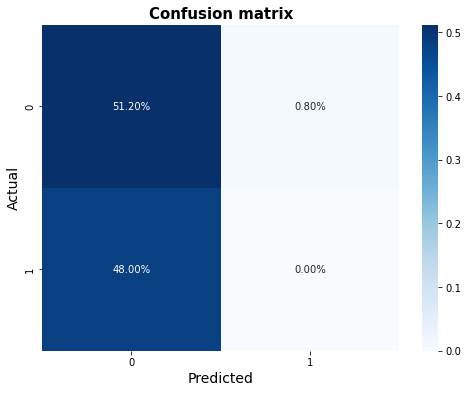

In [32]:
Lg_y_preds = model.predict(test_feature)
plot_confusion_metrics(test_labels, Lg_y_preds)

### Important Feature


In [15]:
imp_featur = pd.DataFrame({"Important Feature":model.coef_[0]})
imp_featur['Feature'] = feature_columns
imp_featur = imp_featur.set_index('Feature')
imp_featur = imp_featur.sort_values(by=['Important Feature'], ascending=False)
imp_featur

,Important Feature
Feature,
Platform os,0.59
Experiment,0.05
Hour,0.02
Date of week,0.01
Date of month,0.01
Device make,0.00
Browser,-0.01


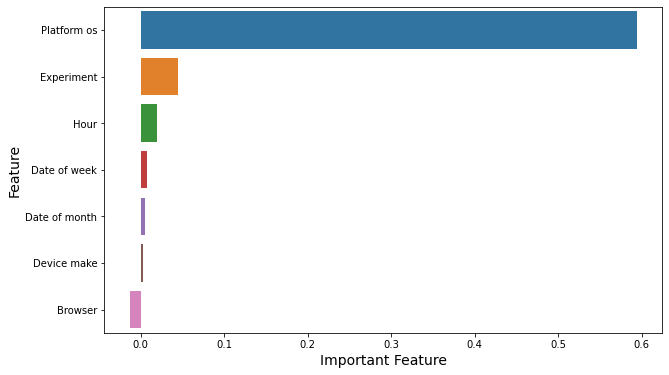

In [16]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Important Feature", y=imp_featur.index, data=imp_featur)
plt.ylabel('Feature', fontsize=14)
plt.xlabel('Important Feature', fontsize=14)
plt.show()

In the plot above we can see the importance of each feature on brand awareness. 
The Platform os is the important feature for brand awerness.

### XGBoost

In [17]:
xgboost_model= pickle.load(open("../models/xgboost_model.pickle", "rb"))
xgboost_model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.02, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, ...)

#### Confusion Matrix

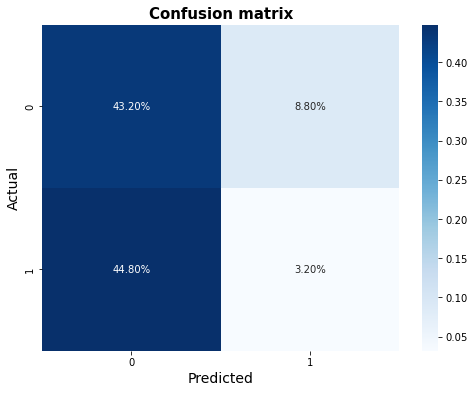

In [33]:
xgy_preds = xgboost_model.predict(test_feature)
plot_confusion_metrics(test_labels, xgy_preds)


In [19]:
imp_featur = pd.DataFrame({"Important Feature": xgboost_model.feature_importances_})
imp_featur['Feature'] = feature_columns
imp_featur = imp_featur.set_index('Feature')
imp_featur = imp_featur.sort_values(by=['Important Feature'], ascending=False)
imp_featur


,Important Feature
Feature,
Device make,0.20
Date of week,0.18
Date of month,0.17
Experiment,0.16
Hour,0.16
Browser,0.12
Platform os,0.00


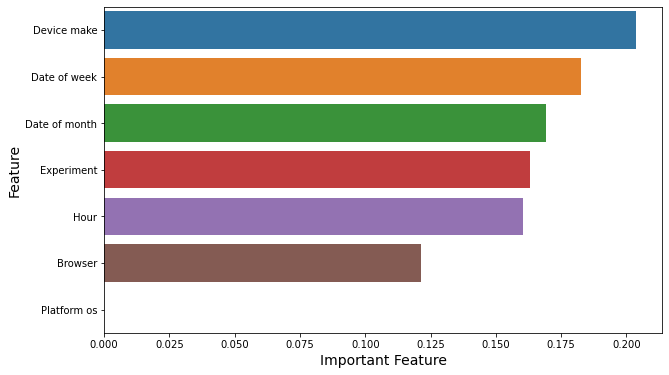

In [20]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Important Feature", y=imp_featur.index, data=imp_featur)
plt.ylabel('Feature', fontsize=14)
plt.xlabel('Important Feature', fontsize=14)
plt.show()

In the above we can see that the features has almost the same role in determaining brand awerness.



#### Decision Tree Classifier


In [21]:
dic_model =  pickle.load(open("../models/decision_tree_model.pickle", "rb"))
dic_model

DecisionTreeClassifier(max_depth=2, random_state=42)

In [22]:
dtree_pred = dic_model.predict(test_feature)

In [23]:
metrics.accuracy_score(test_labels, dtree_pred)

0.544

### Confusion Matrix

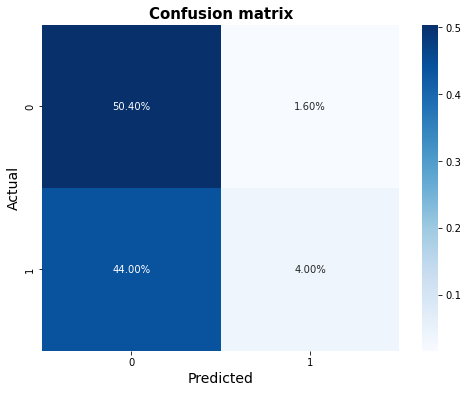

In [24]:
y_preds = dic_model.predict(test_feature)
plot_confusion_metrics(test_labels, y_preds)


### Random Forest

In [25]:
random_forest_model = pickle.load(open("../models/random_forest_model.pickle", "rb"))

In [26]:
forest_pred = random_forest_model.predict(test_feature)

In [27]:
metrics.accuracy_score(test_labels, forest_pred)

0.472

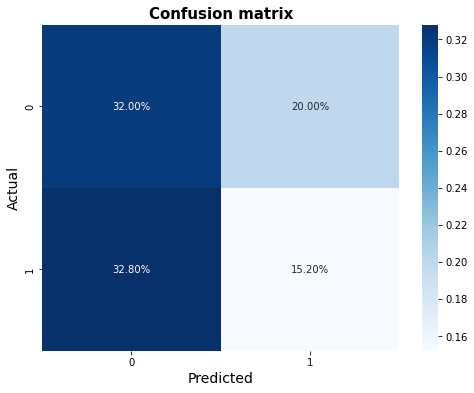

In [31]:
y_preds = random_forest_model.predict(test_feature)
plot_confusion_metrics(test_labels, y_preds)

### Loss Function
Define the appropriate loss function  for the model using the validation data. 


In [36]:
from sklearn.metrics import log_loss
# classification report for Logistic Regression
print("Logistic Regression classification report:")
print(log_loss(test_labels, Lg_y_preds))


# classification report for RandomForest
print("Random Forest classification report:")
print(log_loss(test_labels, forest_pred))

# classification report for Decision Tree Classifier
print("Decision Tree classification report:")
print(log_loss(test_labels, dtree_pred))
# classification report for Decision Tree Classifier
print("XGBoost report:")
print(log_loss(test_labels, xgy_preds))

Logistic Regression classification report:
16.854929277495856
Random Forest classification report:
18.236633855998875
Decision Tree classification report:
15.749694829638152
XGBoost report:
18.51285451224598


In [37]:
# printing the classification report for each classifier to assess performance
from sklearn.metrics import classification_report
# classification report for Logistic Regression
print("Logistic Regression classification report:")
print(classification_report(test_labels, Lg_y_preds))


# classification report for RandomForest
print("Random Forest classification report:")
print(classification_report(test_labels, forest_pred))

# classification report for Decision Tree Classifier
print("Decision Tree classification report:")
print(log_loss(test_labels, dtree_pred))
# classification report for Decision Tree Classifier
print("XGBoost report:")
print(classification_report(test_labels, xgy_preds))

Logistic Regression classification report:
              precision    recall  f1-score   support

           0       0.52      0.98      0.68        65
           1       0.00      0.00      0.00        60

    accuracy                           0.51       125
   macro avg       0.26      0.49      0.34       125
weighted avg       0.27      0.51      0.35       125

Random Forest classification report:
              precision    recall  f1-score   support

           0       0.49      0.62      0.55        65
           1       0.43      0.32      0.37        60

    accuracy                           0.47       125
   macro avg       0.46      0.47      0.46       125
weighted avg       0.46      0.47      0.46       125

Decision Tree classification report:
15.749694829638152
XGBoost report:
              precision    recall  f1-score   support

           0       0.49      0.83      0.62        65
           1       0.27      0.07      0.11        60

    accuracy                  

### Compute feature importance
* Compute feature importance - what’s driving the model? Which parameters are important predictors for the different ML models? What contributes to the goal of gaining more “Yes” results?
---

#### Logistic regression feature importance

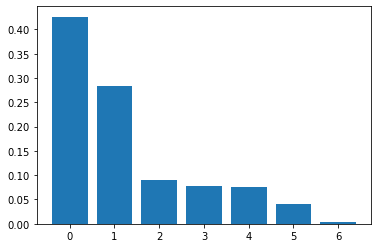

hour            0.43
device_make     0.28
browser         0.09
date_of_week    0.08
date_of_month   0.08
experiment      0.04
platform_os     0.00
dtype: float64

In [40]:
# get importance logistic
# get importance logistic
from matplotlib import pyplot
important_features = pd.Series(random_forest_model.feature_importances_, index=test_feature.columns).sort_values(ascending=False)
# plot feature importance
pyplot.bar([x for x in range(len(important_features))], important_features)
pyplot.show()
important_features

### Random Forest feature importance

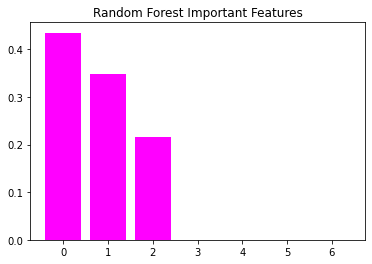

device_make     0.43
hour            0.35
date_of_month   0.22
experiment      0.00
date_of_week    0.00
platform_os     0.00
browser         0.00
dtype: float64

In [54]:
# get importance decision tree
from matplotlib import pyplot
important_features = pd.Series(dic_model.feature_importances_, index=test_feature.columns).sort_values(ascending=False)
# plot feature importance
pyplot.title("Random Forest Important Features")
color = 'Magenta'
pyplot.bar([x for x in range(len(important_features))], important_features,color = color)
pyplot.show()
important_features

### XGBOOST feature importance

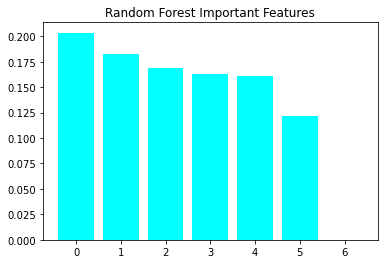

device_make     0.20
date_of_week    0.18
date_of_month   0.17
experiment      0.16
hour            0.16
browser         0.12
platform_os     0.00
dtype: float32

In [60]:
# get importance XGBOOST
from matplotlib import pyplot
important_features = pd.Series(xgboost_model.feature_importances_, index=test_feature.columns).sort_values(ascending=False)
# plot feature importance
pyplot.title("Random Forest Important Features")
color = 'Cyan'
pyplot.bar([x for x in range(len(important_features))], important_features,color = color)
pyplot.show()
important_features

### Randomforest feature importance

In [61]:
important_features = pd.Series(random_forest_model.feature_importances_, index=test_feature.columns).sort_values(ascending=False)
important_features

hour            0.43
device_make     0.28
browser         0.09
date_of_week    0.08
date_of_month   0.08
experiment      0.04
platform_os     0.00
dtype: float64

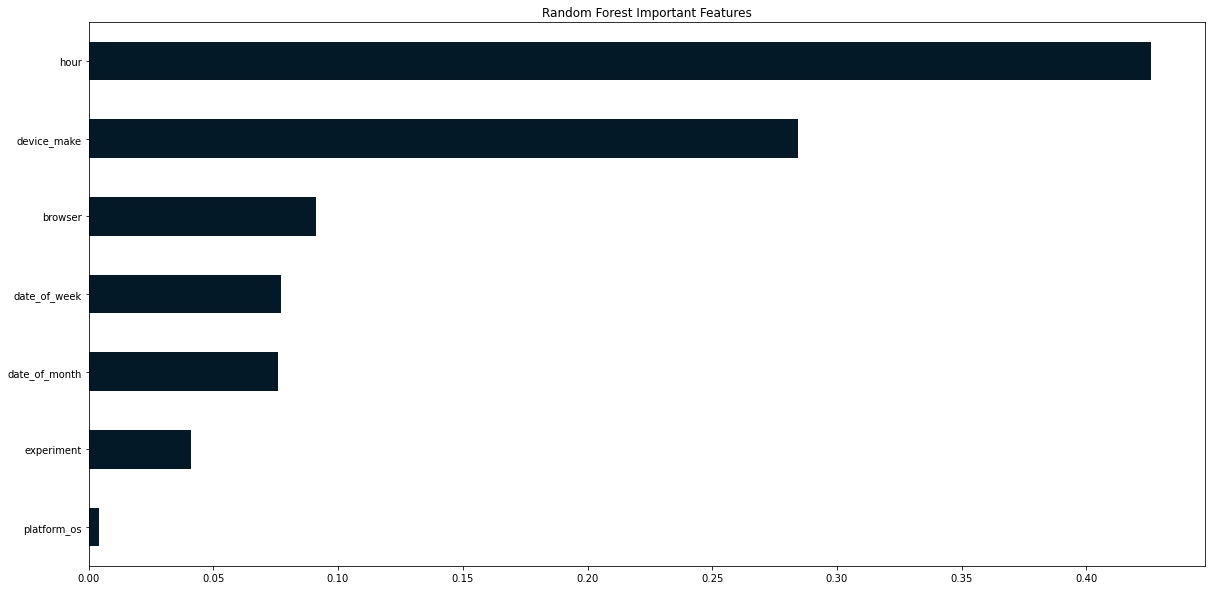

In [62]:
important_features.plot(kind="barh", title="Random Forest Important Features", color="#031927", figsize=(20, 10)).invert_yaxis()